<a href="https://colab.research.google.com/github/abu-bakar-munir/PNEUMONIA-Detection-Using-Deep-Learning/blob/main/PNEUMONIA_Detection_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kagglecomabubakar","key":"1ec7345524fb7ca73567796c2be50455"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:26<00:00, 91.3MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import cv2
import skimage.segmentation
plt.style.use('ggplot')


In [ ]:
!ls

chest-xray-pneumonia  kaggle.json  sample_data


In [ ]:
!ls /content/chest-xray-pneumonia/chest_xray/train/

NORMAL	PNEUMONIA


In [ ]:
import os
data_path = os.listdir('/content/chest-xray-pneumonia/chest_xray/train/')
data_path

['NORMAL', 'PNEUMONIA']

In [ ]:
import os

data_path = "/content/chest-xray-pneumonia/chest_xray/train/"   #change this to your dataset path

total_images = 0

for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):  # make sure it’s a folder  // if class_path is not None
        count = len(os.listdir(class_path))
        total_images += count
        print(f"{class_name}: {count} images")

print(f"\nTotal images in dataset: {total_images}")

NORMAL: 1341 images
PNEUMONIA: 3875 images

Total images in dataset: 5216


In [ ]:
import pathlib
data_dir = pathlib.Path(data_path)
data_dir

PosixPath('/content/chest-xray-pneumonia/chest_xray/train')

In [ ]:
list(data_dir.glob('*/*.*'))[3875:3884]

[PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person571_virus_1114.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person537_bacteria_2262.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1057_bacteria_2991.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person441_bacteria_1905.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1447_bacteria_3741.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person386_virus_771.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person396_bacteria_1796.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person56_bacteria_267.jpeg'),
 PosixPath('/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person123_virus_230.jpeg')]

In [ ]:
labels = ['PNEUMONIA','NORMAL']
img_size = 128
def get_data(data_dir):
    data=[]
    for label in labels:
# train/PNEUMONIA
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [ ]:
train = get_data("/content/chest-xray-pneumonia/chest_xray/train/")
test = get_data("/content/chest-xray-pneumonia/chest_xray/test/")
val = get_data("/content/chest-xray-pneumonia/chest_xray/val/")

In [ ]:
train[0]

array([array([[ 46,  43,  46, ..., 130, 136, 156],
              [ 48,  46,  50, ..., 110, 113, 136],
              [ 53,  47,  50, ..., 125, 118, 131],
              ...,
              [ 13,  14,  11, ...,  13,  13,  14],
              [ 11,  13,  10, ...,  13,  13,  14],
              [ 12,  13,  10, ...,  13,  14,  14]], dtype=uint8), 0],
      dtype=object)

**for checking only one image we use these method**

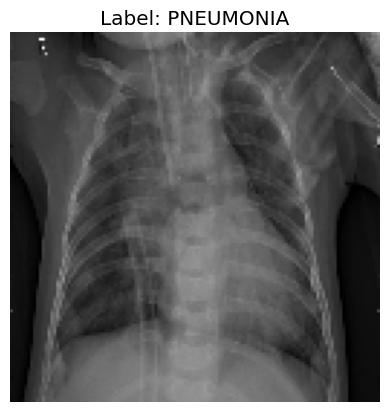

In [ ]:
image , label = train[0]

# Resize it (optional — it's already 128x128 if your get_data used that)
resized_arr = cv2.resize(image, (img_size, img_size))

# Show it
plt.imshow(resized_arr, cmap='gray')
plt.title(f"Label: {labels[label]}")
plt.axis('off')
plt.show()


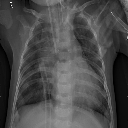

In [ ]:
from PIL import Image

image, label = train[0]
img = Image.fromarray(image)
img

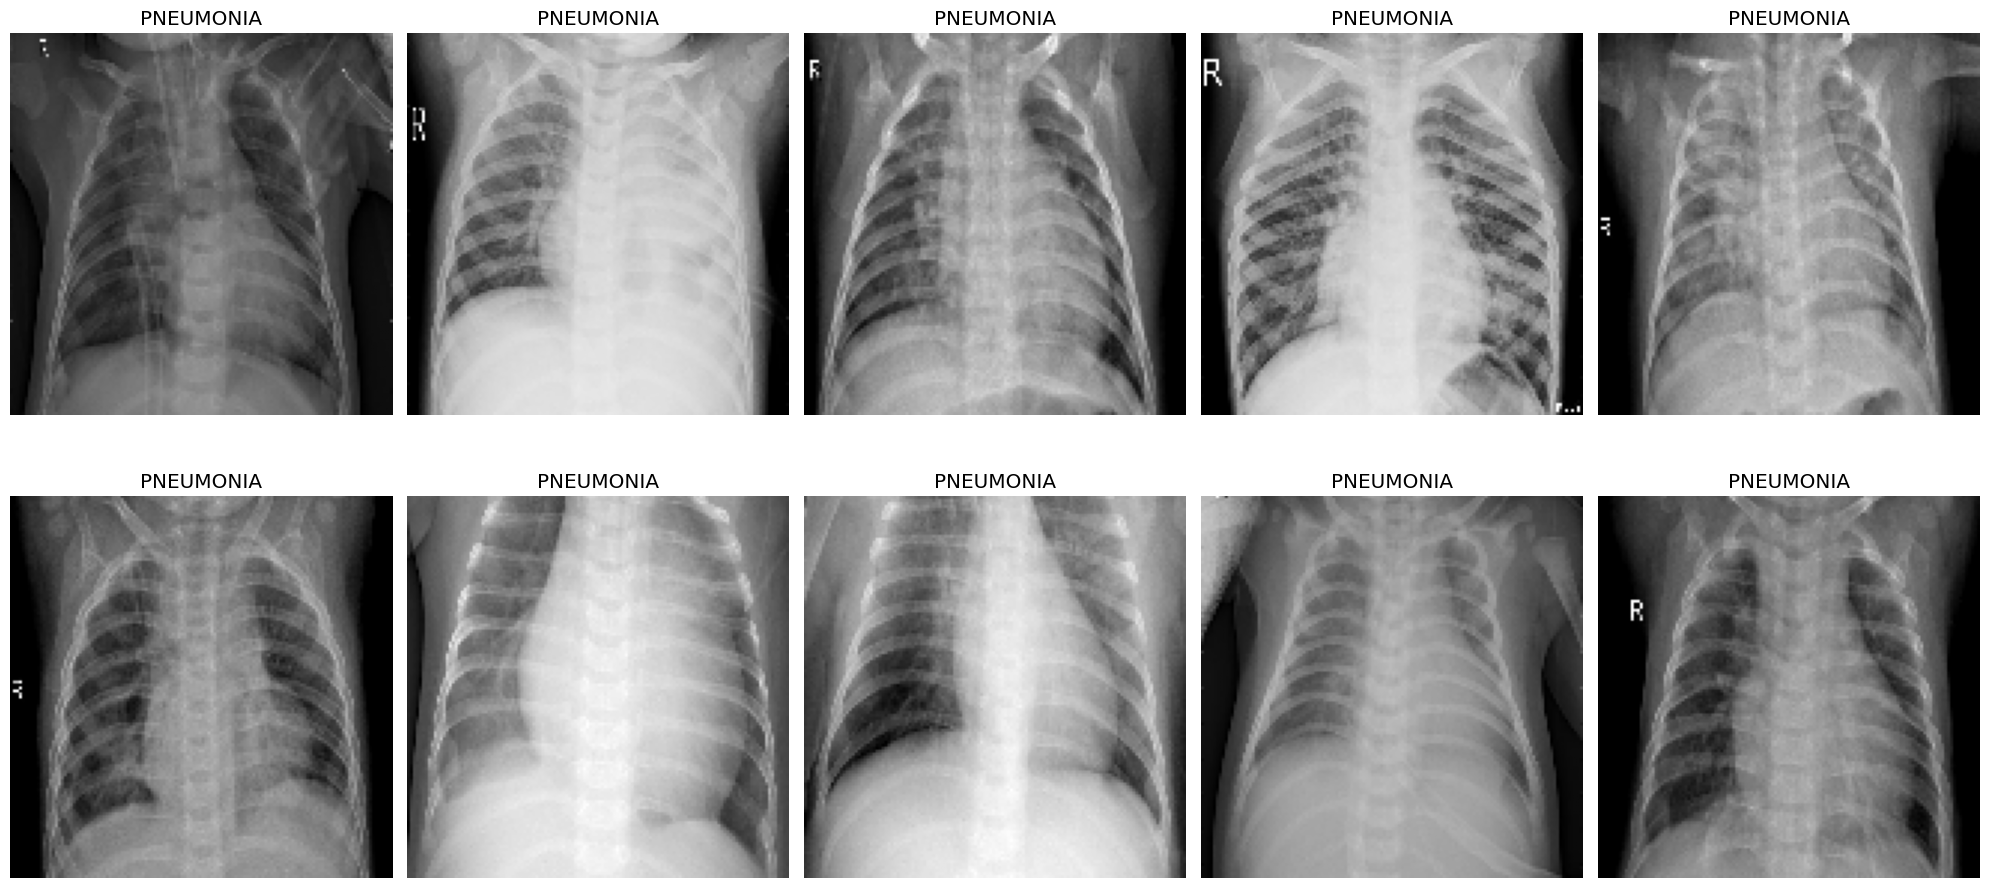

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Show some sample images from the training data
plt.figure(figsize=(20, 10))

for i in range(10):  # show 9 images
    plt.subplot(2, 5, i + 1)
    #img, label = train[i]         # label (0 or 1)
    img =train[i][0]
    label = train[i][1]
    plt.imshow(img, cmap='gray')  # display grayscale image
    plt.title(labels[label])      # show label name
    plt.axis('off')               # hide axes

plt.tight_layout()
plt.show()


In [ ]:
pneumonia = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/")
penomina_dir = "/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"

In [ ]:
x =['w','l','r']

for i in x:
  class_ne = x.index(i)
print(class_ne)


2


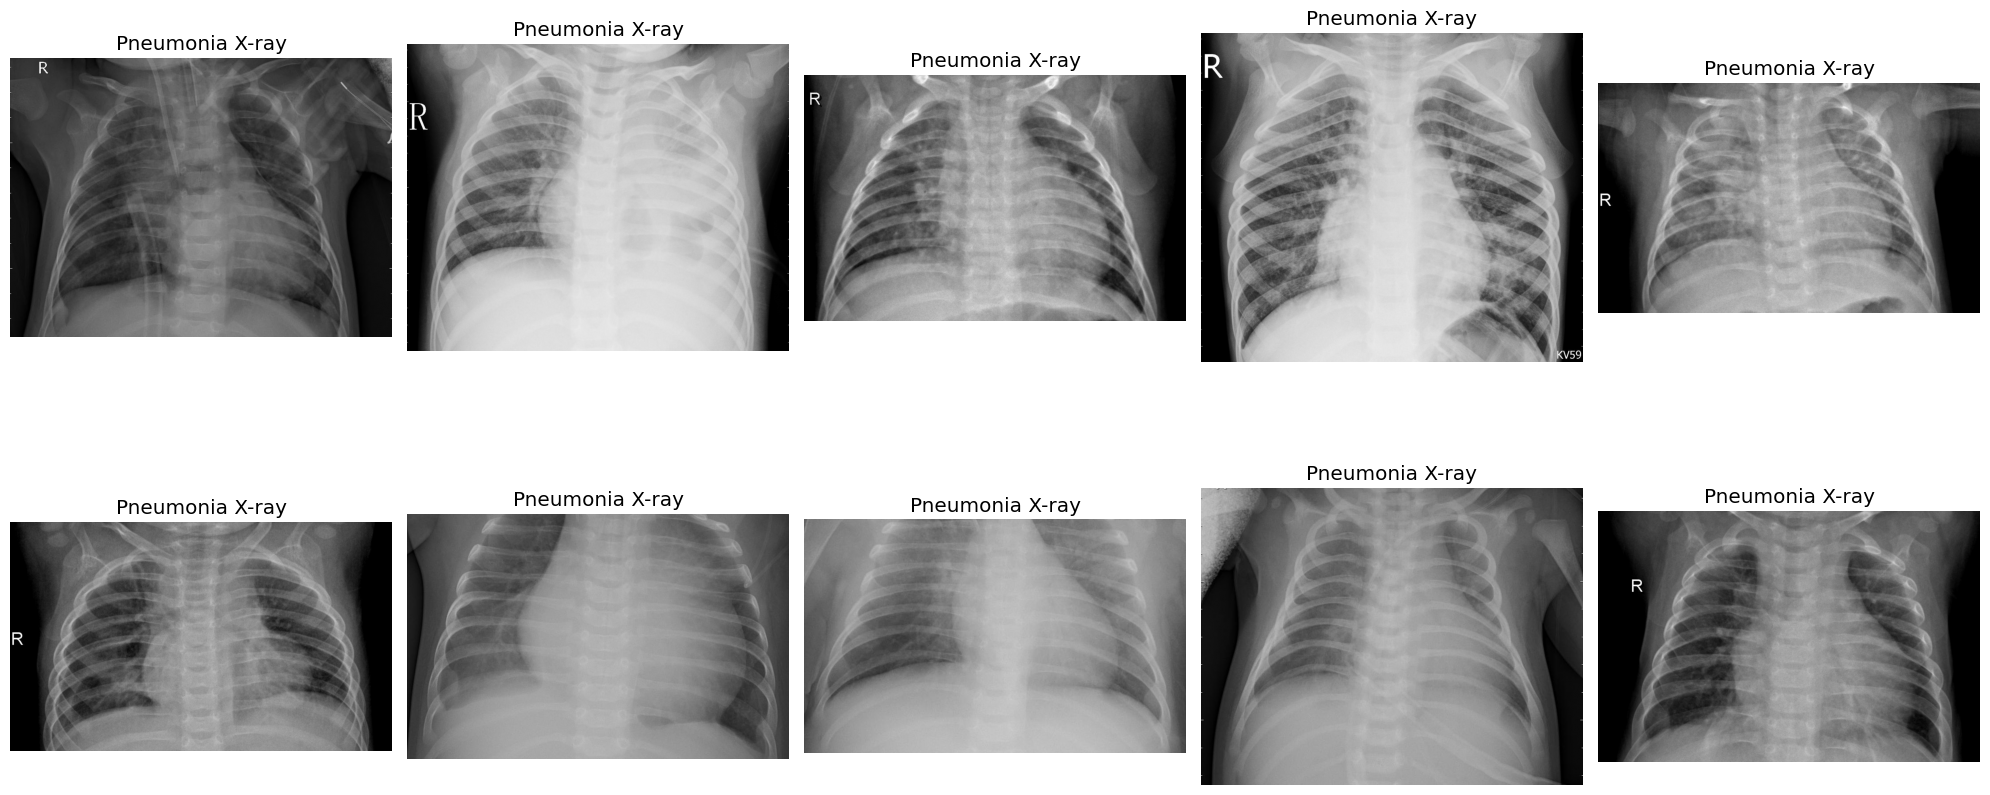

In [ ]:
plt.figure(figsize=(20,10))

for i in range(10):
    plt.subplot(2,5, i+1)
    img = plt.imread(os.path.join(penomina_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")
plt.tight_layout()

**Now For Normal Images In Train Floder**

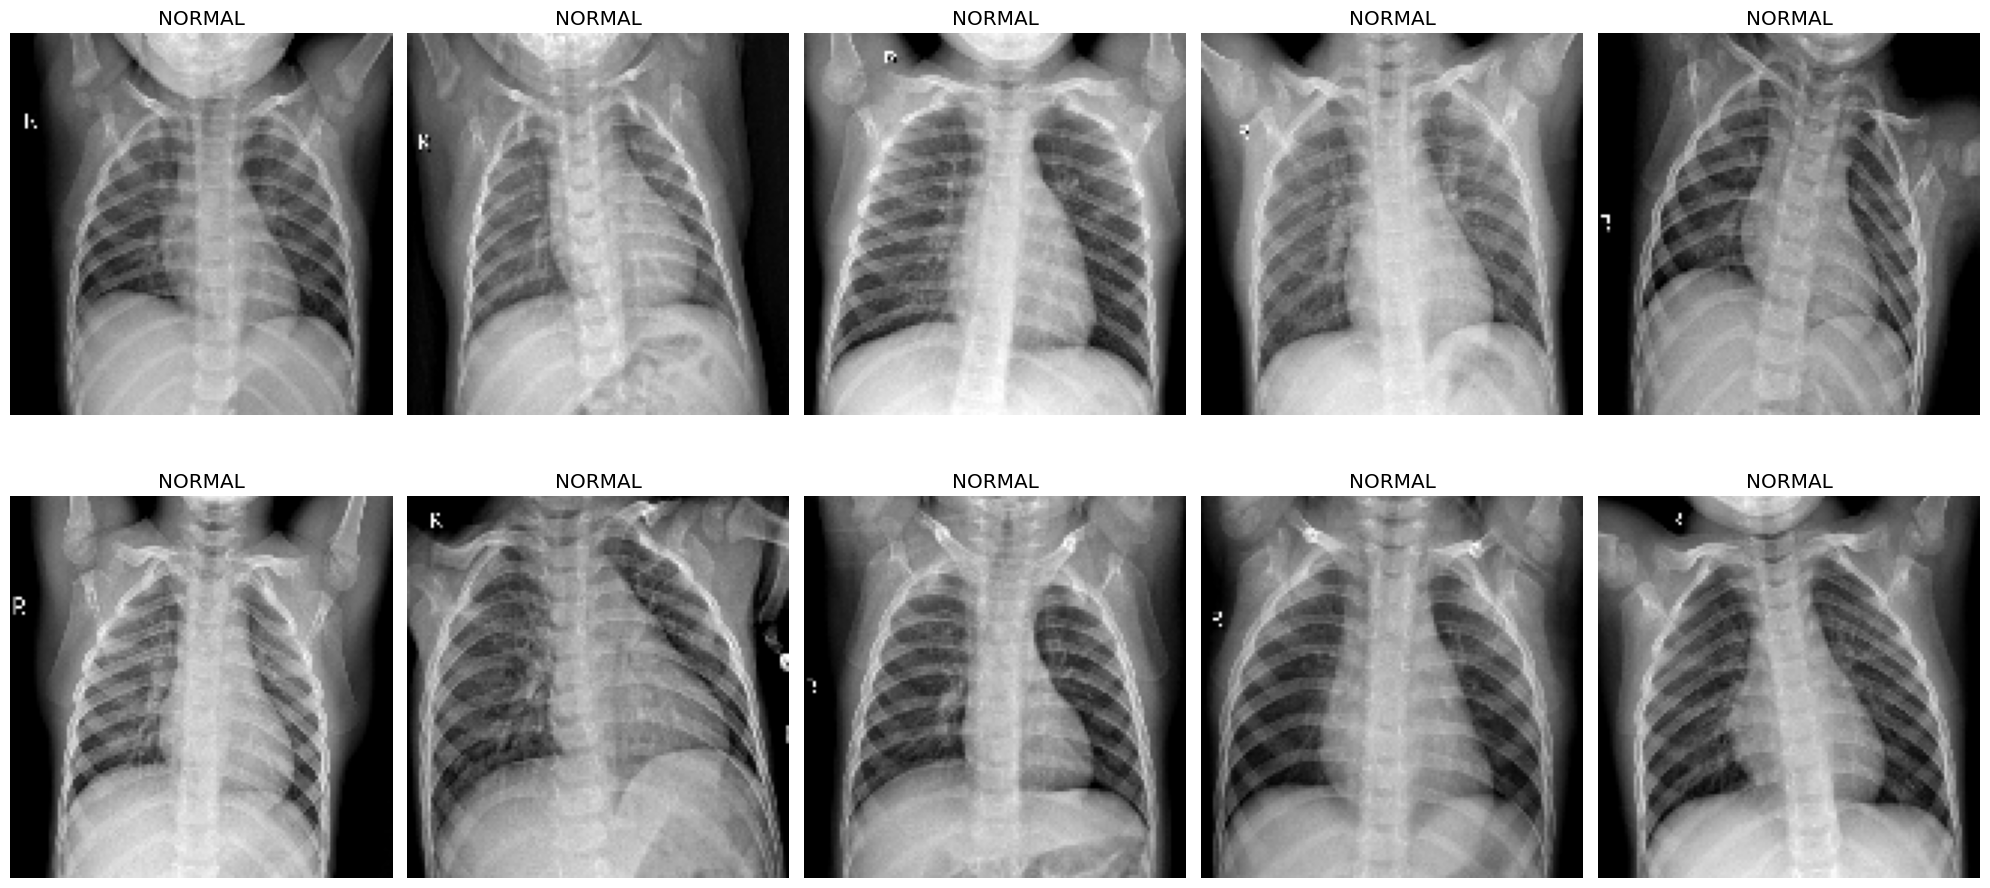

In [ ]:
plt.figure(figsize=(20,10))
count = 0

for img, label in train:
    if label == 1:  # only NORMAL
        plt.subplot(2, 5, count + 1)
        plt.imshow(img, cmap='gray')
        plt.title(labels[label])   # <-- Works perfectly!
        plt.axis('off')
        count += 1
        if count == 10:
            break

plt.tight_layout()
plt.show()


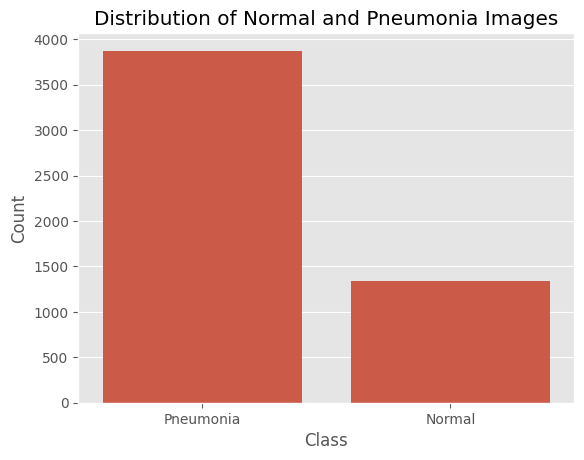

In [ ]:
listx = []
for i in train:
    if i[1] == 0:
        listx.append("Pneumonia")
    else:
        listx.append("Normal")

sns.countplot(x=listx)
plt.title("Distribution of Normal and Pneumonia Images")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


# **Data Augmentation & Resizing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode="nearest")
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/train/",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')
valid_generator = valid_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/val/",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
class_labels = train_generator.class_indices

In [ ]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
class_name = {value:key for (key, value) in class_labels.items()}

In [ ]:
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

# **VGG19 CNN Architecture**

In [ ]:
base_model = VGG19(input_shape = (128,128,3),
                     include_top = False,
                     weights = 'imagenet')

for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.inputs, output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 50,144,642 (191.29 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [ ]:
filepath = "model.h5"
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)
cp=ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, save_weights_only=False,mode="auto", save_freq="epoch")
lrr = ReduceLROnPlateau(monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.0001)

sgd = SGD(learning_rate=0.0001, decay = 1e-6, nesterov = True)

model_01.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
history_01 = model_01.fit(train_generator,
            steps_per_epoch=250,
            epochs=5,
            callbacks=[es, cp, lrr],
            validation_data=valid_generator,
            validation_steps=40)

Epoch 1/5
163/250 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.8098 - loss: 0.4042

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 265ms/step - accuracy: 0.8104 - loss: 0.4024 - val_accuracy: 0.6875 - val_loss: 0.5438 - learning_rate: 1.0000e-04
Epoch 2/5
163/250 ━━━━━━━━━━━━━━━━━━━━ 34s 394ms/step - accuracy: 0.8201 - loss: 0.3857

250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 274ms/step - accuracy: 0.8230 - loss: 0.3813 - val_accuracy: 0.7500 - val_loss: 0.5423 - learning_rate: 1.0000e-04
Epoch 3/5
163/250 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.8238 - loss: 0.3684

250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 269ms/step - accuracy: 0.8251 - loss: 0.3686 - val_accuracy: 0.8125 - val_loss: 0.5084 - learning_rate: 1.0000e-04
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 0.8415 - loss: 0.3416 - val_accuracy: 0.7500 - val_loss: 0.5352 - learning_rate: 1.0000e-04
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 255ms/step - accuracy: 0.8371 - loss: 0.3517 - val_accuracy: 0.7500 - val_loss: 0.5463 - learning_rate: 1.0000e-04


In [ ]:
history_01.history

{'accuracy': [0.8115414381027222,
  0.8284125924110413,
  0.8274539709091187,
  0.8358895778656006,
  0.8397239446640015],
 'loss': [0.3991452157497406,
  0.3732185363769531,
  0.3691480755805969,
  0.3477545380592346,
  0.34837305545806885],
 'val_accuracy': [0.6875, 0.75, 0.8125, 0.75, 0.75],
 'val_loss': [0.5437519550323486,
  0.5423335433006287,
  0.5084271430969238,
  0.5352447032928467,
  0.5462522506713867],
 'learning_rate': [9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05,
  9.999999747378752e-05]}

# Convert training history to a DataFrame

In [ ]:
# Convert history to DataFrame
history_df = pd.DataFrame(history_01.history)

# Show first few rows
print(history_df.head())


   accuracy      loss  val_accuracy  val_loss  learning_rate
0  0.811541  0.399145        0.6875  0.543752         0.0001
1  0.828413  0.373219        0.7500  0.542334         0.0001
2  0.827454  0.369148        0.8125  0.508427         0.0001
3  0.835890  0.347755        0.7500  0.535245         0.0001
4  0.839724  0.348373        0.7500  0.546252         0.0001


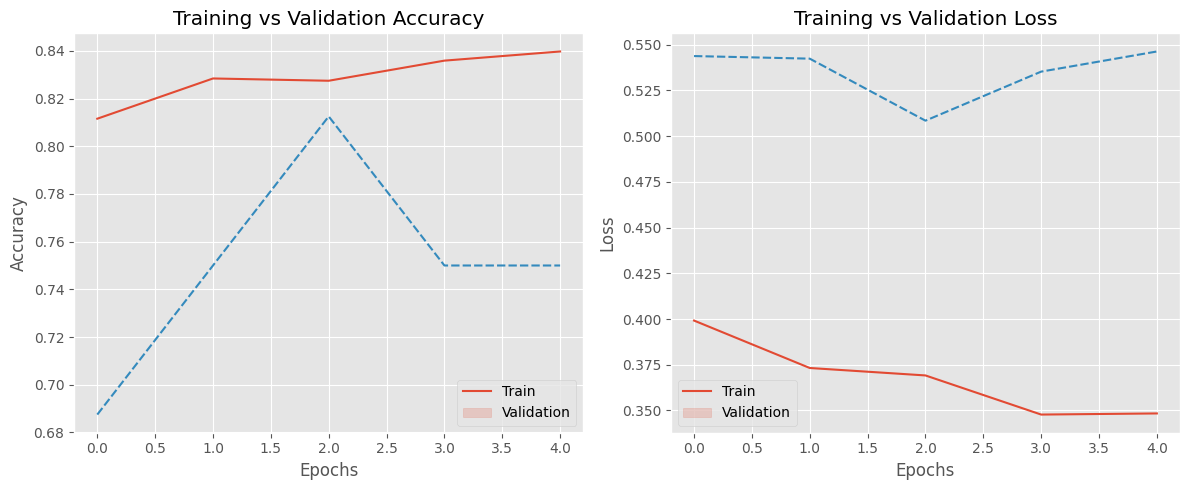

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(ax=axes[0], data=history_df[['accuracy', 'val_accuracy']])
axes[0].set_title('Training vs Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Validation'])

sns.lineplot(ax=axes[1], data=history_df[['loss', 'val_loss']])
axes[1].set_title('Training vs Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_01.save(filepath = "model_weights/vgg19_model_01.h5", overwrite=True)

In [ ]:
test_generator = test_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/test/",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 624 images belonging to 2 classes.


In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.h5")

vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7500 - loss: 0.5463


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.7892 - loss: 0.4394


In [ ]:
print(f"Validation Loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_01[1]}")
print(f"Test Loss: {vgg_test_eval_01[0]}")
print(f"Test Accuarcy: {vgg_test_eval_01[1]}")

Validation Loss: 0.5462522506713867
Validation Accuarcy: 0.75
Test Loss: 0.4150960445404053
Test Accuarcy: 0.8141025900840759


# ** Increamental unfreezing & fine tuning**

In [ ]:
base_model = VGG19(include_top=False, input_shape=(128,128,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

x = base_model.output
flat = Flatten()(x)


class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights("model_weights/vgg19_model_01.h5")

set_trainable = False
for layer in base_model.layers:
    if layer.name in [ 'block5_conv3','block5_conv4']:
        set_trainable=True
    if set_trainable:
        set_trainable=True
    else:
        set_trainable=False
print(model_02.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4608)           │             

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 63,089,602 (240.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
base_model_layer_names

['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.0, nesterov = True)

model_02.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
history_02 = model_02.fit(train_generator,
            steps_per_epoch=10,
            epochs=1,
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 574ms/step - accuracy: 0.8825 - loss: 0.3065 - val_accuracy: 0.7500 - val_loss: 0.5348 - learning_rate: 1.0000e-04


In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_02.save(filepath = "model_weights/vgg19_model_02.h5", overwrite=True)

In [ ]:
model_02.load_weights("model_weights/vgg19_model_02.h5")

vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

print(f"Validation Loss: {vgg_val_eval_02[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_02[1]}")
print(f"Test Loss: {vgg_test_eval_02[0]}")
print(f"Test Accuarcy: {vgg_test_eval_02[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7500 - loss: 0.5348
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.8250 - loss: 0.4165
Validation Loss: 0.5348175168037415
Validation Accuarcy: 0.75
Test Loss: 0.40885239839553833
Test Accuarcy: 0.8141025900840759


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
sns.barplot(ax=axes[0], x=['Validation', 'Test'], y=[vgg_val_eval_02[1], vgg_test_eval_02[1]])
axes[0].set_title('Validation vs Test Accuracy')
axes[0].set_ylabel('Accuracy')

# Loss plot
sns.barplot(ax=axes[1], x=['Validation', 'Test'], y=[vgg_val_eval_02[0], vgg_test_eval_02[0]])
axes[1].set_title('Validation vs Test Loss')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

## *Unfreezing and fine tuning the entire network*

In [ ]:
base_model = VGG19(include_top=False, input_shape=(128,128,3))

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights("model_weights/vgg19_model_01.h5")

print(model_03.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 63,089,602 (240.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.0, nesterov = True)

model_03.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_03 = model_02.fit(train_generator,
            steps_per_epoch=100,
            epochs=1,
            callbacks=[es, cp, lrr],
            validation_data=valid_generator)

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.8509 - loss: 0.3292 - val_accuracy: 0.7500 - val_loss: 0.6604 - learning_rate: 1.0000e-04


In [ ]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_02.save(filepath = "model_weights/vgg_unfrozen.h5", overwrite=True)